# Community demo #1

To run the community notebooks will need TMSiSDK. We have made it possible to access our branch of their library. 

To do this :
    1. Go to this page (the ReSurfEMG releases page):
    https://github.com/ReSurfEMG/ReSurfEMG/releases
    2. Download resurfemg-0.0.3-py3-none-any.whl (this is the package
    installed by pip)
    4. Run pip install ./resurfemg-0.0.3-py3-none-any.whl ( match the path your put the .whl file in)
    5. Open the notebooks (you should have jupyter in your environment to do this)
    6. Try importing TMSiSDK and ReSurfemgas in the next cell


In [1]:
import numpy as np
import TMSiSDK
import resurfemg
import math
import matplotlib.pyplot as plt

Here we are going to make synthetic EMGs, which can be used to demonstrate how our package works.

In [2]:
t

NameError: name 't' is not defined

In [9]:
t = list(range(1000))
plt.plot(t, math.sin(t*6/60*2*pi))#'.^2 .* randn(length(t),1) + 0.1 * randn(length(t), 1))


TypeError: unsupported operand type(s) for /: 'list' and 'int'

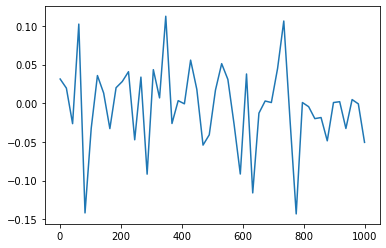

In [17]:
# x.label('t(s)')
# y.label('ExG(uV)')
pi= 3.1416
x = np.linspace(1, 1000)
t = np.sin((x*6/60*2*pi)**2) * np.random.normal(scale=0.1, size=len(x))
plt.plot(x,t )#'.^2 .* randn(length(t),1) + 0.1 * randn(length(t), 1))

In [ ]:
# # MATLAB

# t = (0:2000)/100;
# plot(t, sin(t*6/60*2*pi)'.^2 .* randn(length(t),1) + 0.1 * randn(length(t), 1))
# xlabel('t(s)')
# ylabel('ExG(uV)')